<a href="https://colab.research.google.com/github/PhanTung-06/CS114.L21/blob/main/LinearRegression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statistics as sta

In [ ]:
drive.mount('/content/drive')
path_data = "/content/drive/MyDrive/Colab Notebooks/Linear_Regression_ML/data_Linear_regression_ML/data.csv"
df = pd.read_csv(path_data)
path_data2 = "/content/drive/MyDrive/Colab Notebooks/Linear_Regression_ML/data_Linear_regression_ML/data2.csv"
df2 = pd.read_csv(path_data2)
path_data3 = "/content/drive/MyDrive/Colab Notebooks/Linear_Regression_ML/data_Linear_regression_ML/data3.csv"
df3 = pd.read_csv(path_data3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = df['X']
y_train = df['y']
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
#X_train = (X_train - X_train.mean())/np.var(X_train)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

w = regressor.coef_[0][0]
print(w) #Hệ số w
b = regressor.intercept_[0]
print(b) #Bias

2.840607070063793e-07
-0.054590930661072345


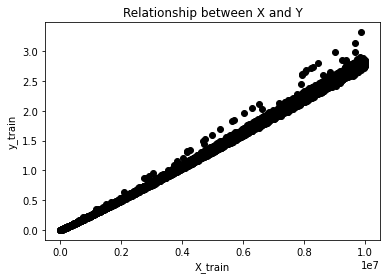

In [ ]:
plt.title('Relationship between X and Y')
plt.scatter(X_train, y_train,  color='black')
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.show()

In [ ]:
#mse của tập train
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)

0.001771505316731242


In [ ]:
#mse của data2
X_test2 = df2['X']
y_test2 = df2['y']
X_test2= np.array(X_test2)
y_test2 = np.array(y_test2)
X_test2 = X_test2.reshape(-1, 1)
y_test2 = y_test2.reshape(-1, 1)
#X_test2 = (X_test2 - X_test2.mean())/np.var(X_test2)
y_pred2 = regressor.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
print(mse2)

1.249740780126939


In [ ]:
#mse của data3
X_test3 = df3['X']
y_test3 = df3['y']
X_test3= np.array(X_test3)
y_test3 = np.array(y_test3)
X_test3 = X_test3.reshape(-1, 1)
y_test3 = y_test3.reshape(-1, 1)
#X_test3 = (X_test3 - X_test3.mean())/np.var(X_test3)
y_pred3 = regressor.predict(X_test3)
mse3 = mean_squared_error(y_test3, y_pred3)
print(mse3)

35.117405892794075


##TEST linear regression regularization với lambda băng 10^17

In [ ]:
lr = Ridge(alpha=10**17)
lr.fit(X_train, y_train)

Ridge(alpha=100000000000000000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
#mse của tập train
y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)

0.3301167227455732


In [ ]:
#mse của data2
ypred2 = lr.predict(X_test2)
mse2 = mean_squared_error(y_test2, ypred2)
print(mse2)

0.9163351614144436


In [ ]:
#mse của data3
ypred3 = lr.predict(X_test3)
mse3 = mean_squared_error(y_test3, ypred3)
print(mse3)

0.7929268653689405


##Nhận xét:

- Mô hình trên bị overfit
- Cách khắc phục: Dùng regularization

Vậy chọn lambda như thế nào ?
- Chia dữ liệu thành 2 phần: training(80%), cross-validation(20%)
- Vẽ biểu đồ tính mse của bộ train và cv với lambda từ nhỏ đến lớn
- Chọn lambda tại điểm mà Jcv bé nhất

In [ ]:
# #Chia tập dữ liệu
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.2, random_state = 101)


In [ ]:
# print(X_train)

In [ ]:
# plt.title('Relationship between X and Y')
# plt.scatter(X_train, y_train,  color='black')
# plt.xlabel("X_train")
# plt.ylabel("y_train")
# plt.show()

In [ ]:
# mse_cv_min = 100000
# ld = 0
# for k in range(0, 1000):
#   lr = Ridge(alpha=(k*0.0000001))
#   lr.fit(X_train, y_train)
#   y_train_pred = lr.predict(X_train)
#   mse_train_pred = mean_squared_error(y_train, y_train_pred)
#   y_cv_pred = lr.predict(X_cv)
#   mse_cv_pred = mean_squared_error(y_cv, y_cv_pred)
#   print(k)
#   print(mse_cv_pred)
#   plt.plot([k,], [mse_train_pred,], 'go')
#   plt.plot([k,], [mse_cv_pred,], 'g^')

# plt.show()




In [ ]:
print(mse_cv_min)

100000
